In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
# Load data
df = pd.read_csv(r'C:\Users\Navin S\Downloads\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv')
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30-08-2024,16436,10705,225,19026,3925,59.0
1,15-09-2023,15499,10671,267,18421,4519,61.0
2,28-12-2021,1756,2352,0,3775,0,13.0
3,11-01-2023,10536,8347,223,14072,0,48.0
4,11-09-2021,820,612,0,1283,0,11.0


In [2]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


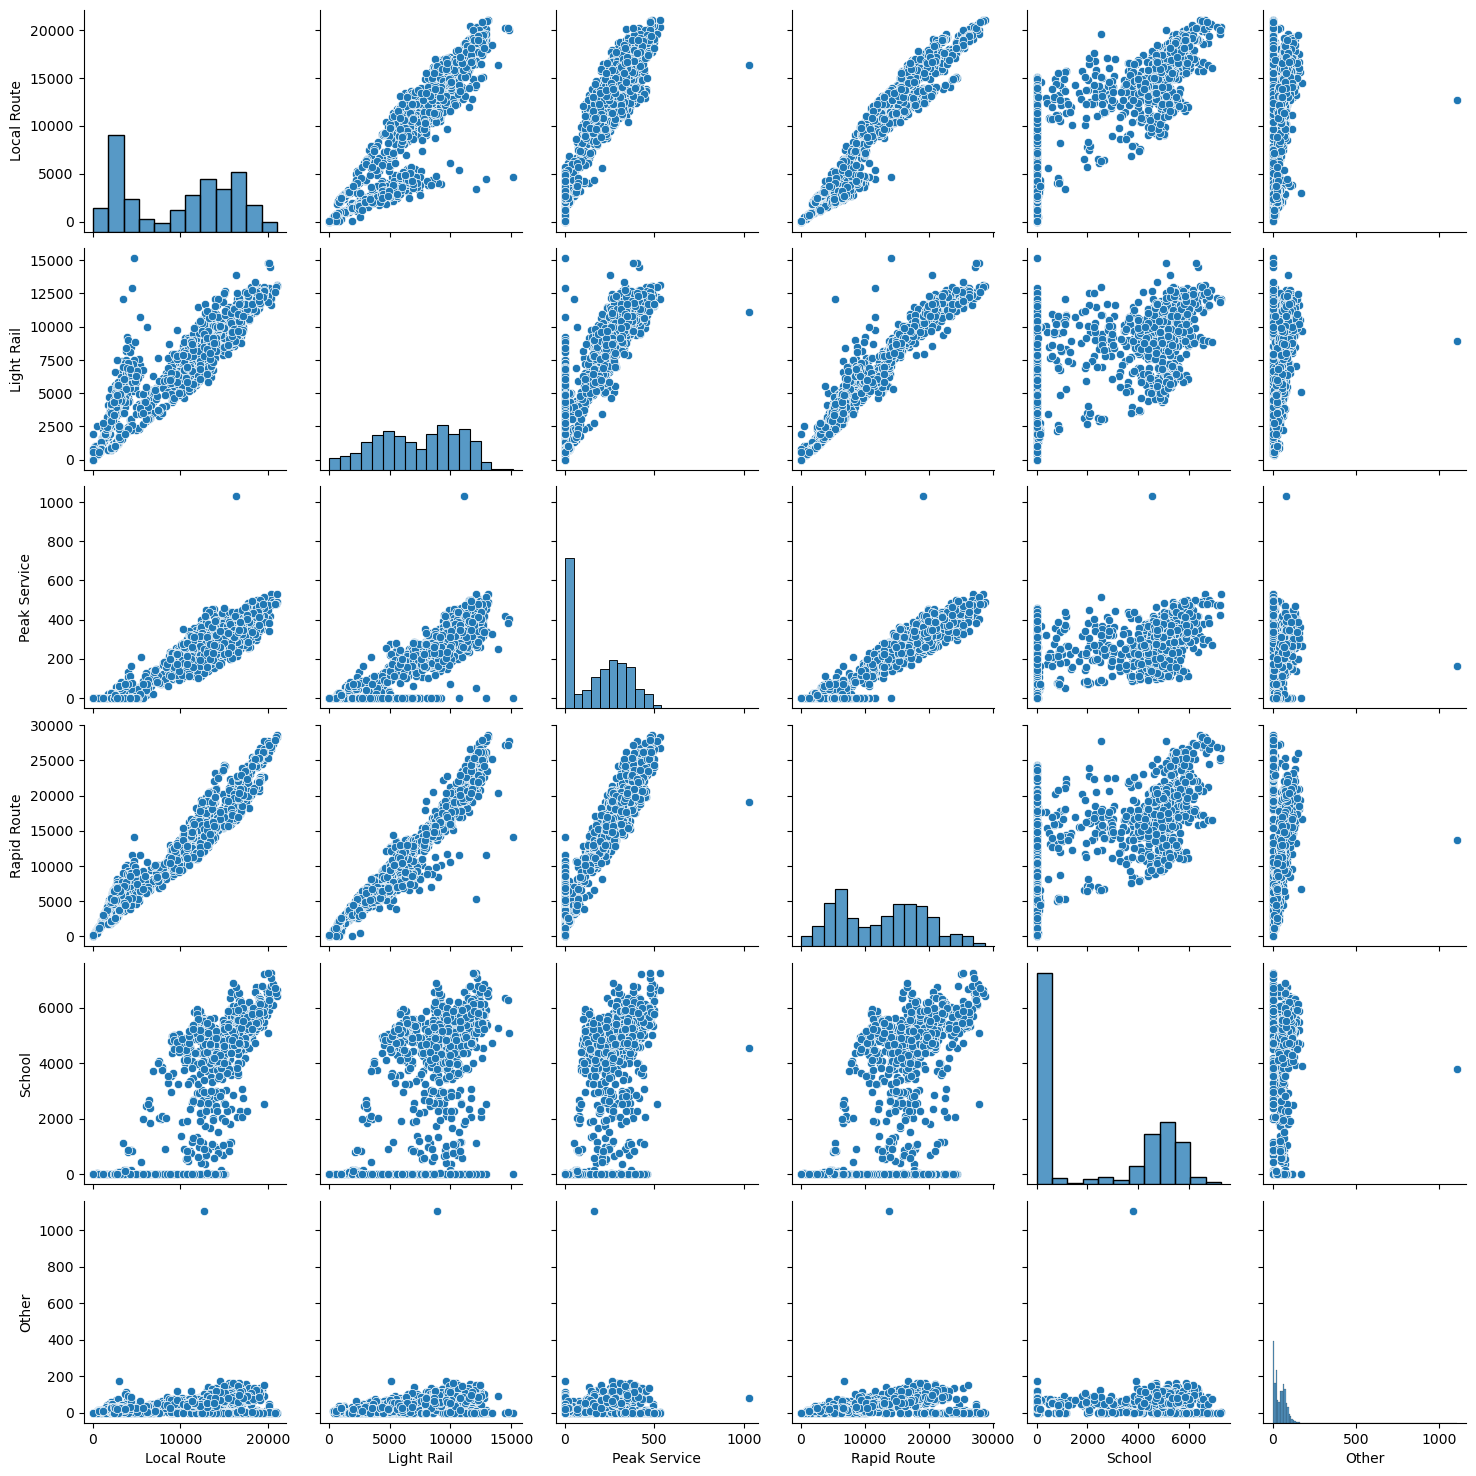

In [3]:
sns.pairplot(df)

In [4]:
# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
transport_data = df.sort_values('Date')

# Fill missing values (forward fill)
transport_data = transport_data.set_index('Date').asfreq('D').fillna(method='ffill')
transport_data.head(10)

C:\Users\Navin S\AppData\Local\Temp\ipykernel_4596\1387828102.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  transport_data = transport_data.set_index('Date').asfreq('D').fillna(method='ffill')


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN
2019-07-06,5214,6141,0,6925,0,NaN
2019-07-07,4065,4332,0,5426,0,NaN
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0


In [5]:
# Data Preprocessing
df.info()
# Check for any missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB


Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [6]:
# Drop rows with missing values in 'Base price' or 'Winning bid'
df_cleaned = df.dropna(subset=['Other', 'School'])

# Verify cleaning
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1898 non-null   datetime64[ns]
 1   Local Route   1898 non-null   int64         
 2   Light Rail    1898 non-null   int64         
 3   Peak Service  1898 non-null   int64         
 4   Rapid Route   1898 non-null   int64         
 5   School        1898 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 118.6 KB


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-08-30,16436,10705,225,19026,3925,59.0
1,2023-09-15,15499,10671,267,18421,4519,61.0
2,2021-12-28,1756,2352,0,3775,0,13.0
3,2023-01-11,10536,8347,223,14072,0,48.0
4,2021-09-11,820,612,0,1283,0,11.0


C:\Users\Navin S\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Navin S\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Navin S\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Navin S\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


7-Day Forecast Results:
             Local Route   Light Rail  Peak Service  Rapid Route      School
2024-09-30  3997.143331  2261.732358     41.209437  4658.812067  145.419819
2024-10-01  3119.726333  1732.363704     23.783791  3667.542173  145.463477
2024-10-02  3781.383338  2252.958574     46.009633  4875.497241  141.753835
2024-10-03  5595.811578  3051.844995     64.002740  6433.837996  137.923928
2024-10-04  6174.728466  2983.135392     72.857763  6804.328865  134.139448
2024-10-05  7766.941402  3814.113405     88.615228  8199.234594  130.619488
2024-10-06  5584.918064  2948.130919     83.507443  5962.476087  130.647365


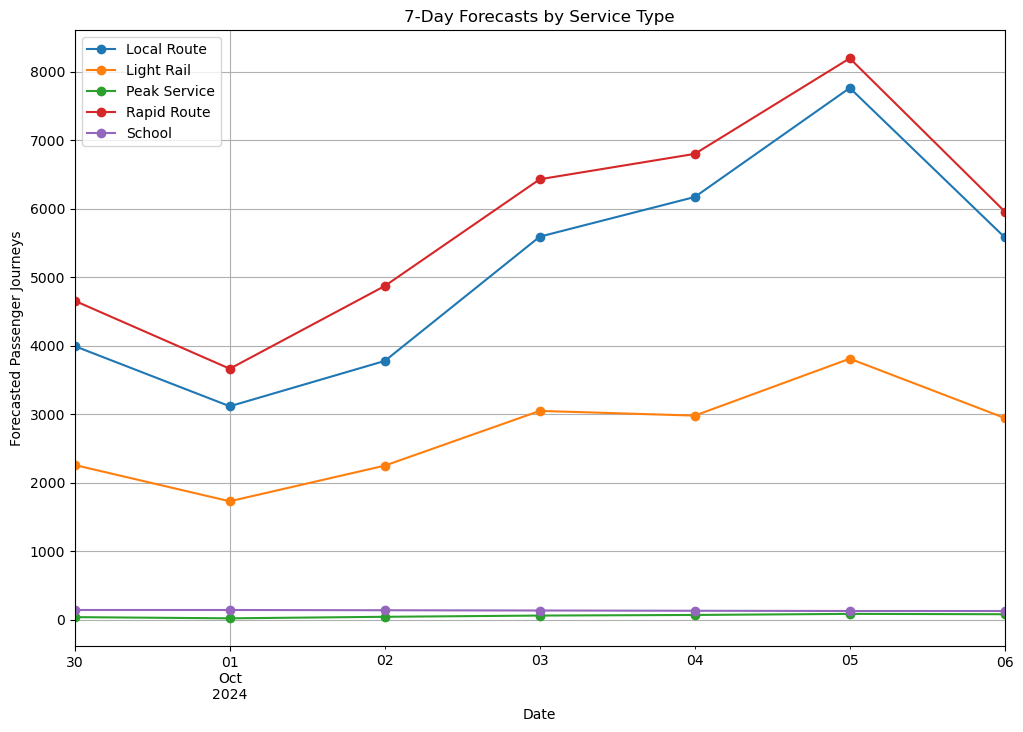

In [13]:
#FORECAST FOR 7 DAYS
# Forecast for next seven days
service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

forecasts = {}
for service in service_types:
    model = ExponentialSmoothing(
        transport_data[service], 
        seasonal='add', 
        seasonal_periods=365
    ).fit()
    
    forecasts[service] = model.forecast(7)

# Combine all forecasts
forecast_results = pd.DataFrame(forecasts, index=pd.date_range(start=transport_data.index[-1] + pd.Timedelta(days=1), periods=7))
print("7-Day Forecast Results:\n", forecast_results)

# Plot forecasts
forecast_results.plot(figsize=(12, 8), marker='o', title="7-Day Forecasts by Service Type")
plt.xlabel("Date")
plt.ylabel("Forecasted Passenger Journeys")
plt.grid(True)
plt.show()


Summary Statistics:
         Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000   
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000   
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000   
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000   

             Other  
count  1911.000000  
mean     43.102564  
std      41.750906  
min       0.000000  
25%      14.000000  
50%      40.000000  
75%      68.000000  
max    1105.000000  

Missing Values:
 Local Route     0
Light Rail      0
Peak Service    0
Rapid Route    

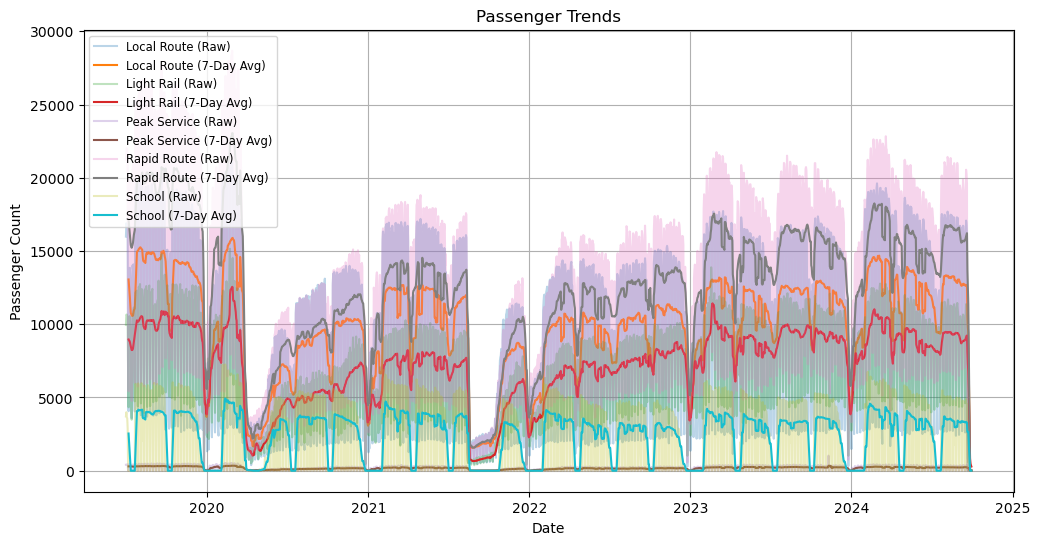

In [15]:
# Passenger Trends
summary = transport_data.describe()
missing_values = transport_data.isnull().sum()

print("Summary Statistics:\n", summary)
print("\nMissing Values:\n", missing_values)

# Calculate rolling averages to identify anomalies
rolling_means = transport_data[service_types].rolling(window=7).mean()

# Plot raw data vs rolling mean
plt.figure(figsize=(12, 6))
for service in service_types:
    plt.plot(transport_data.index, transport_data[service], label=f'{service} (Raw)', alpha=0.3)
    plt.plot(transport_data.index, rolling_means[service], label=f'{service} (7-Day Avg)')

plt.title("Passenger Trends")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()



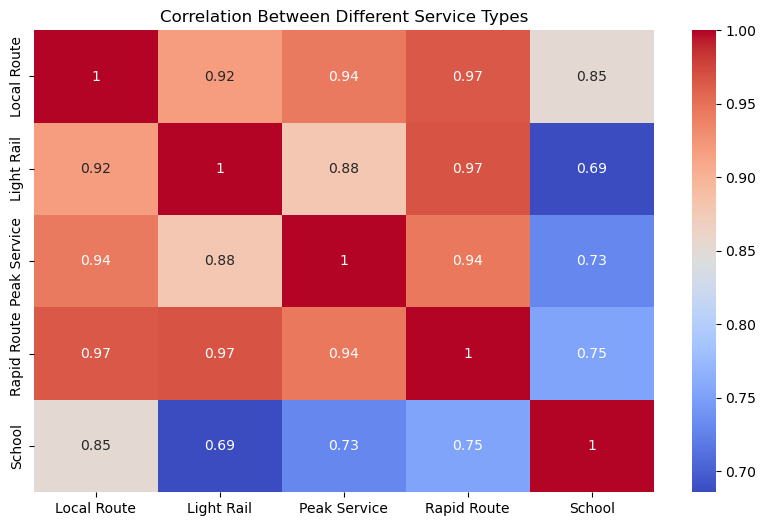

In [16]:
# Correlation matrix
correlation_matrix = transport_data[service_types].corr()

# Plot heatmap of correlations
import seaborn as sns
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Different Service Types")
plt.show()


<Figure size 1200x600 with 0 Axes>

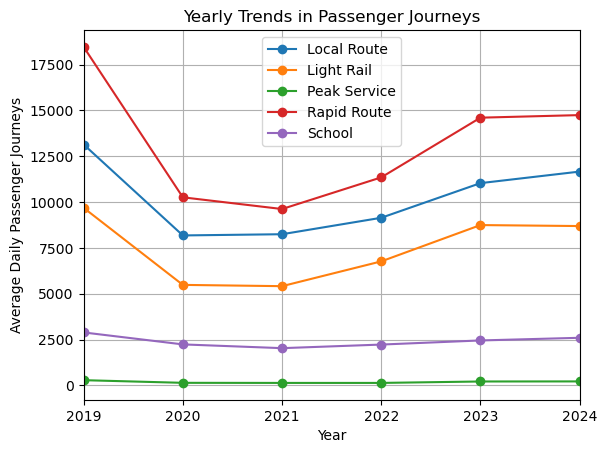

In [19]:
# Segregation by year
yearly_data = transport_data[service_types].resample('YE').mean()

plt.figure(figsize=(12, 6))
yearly_data.plot(marker='o', title="Yearly Trends in Passenger Journeys")
plt.xlabel("Year")
plt.ylabel("Average Daily Passenger Journeys")
plt.grid(True)
plt.show()


In [20]:
#MONTHLY GROWTH RATES
# Monthly growth rate calculation
monthly_data = transport_data[service_types].resample('ME').sum()
monthly_growth = monthly_data.pct_change() * 100

print("Monthly Growth Rates (%):")
print(monthly_growth)

Monthly Growth Rates (%):
            Local Route  Light Rail  Peak Service  Rapid Route      School
Date                                                                      
2019-07-31          NaN         NaN           NaN          NaN         NaN
2019-08-31    12.343614    8.124289     -0.010504    12.275992   87.256362
2019-09-30    -7.092428   -3.502351     -3.309171    -6.193531   -6.473007
2019-10-31    -3.927201    4.904793     -0.706215     4.966640  -28.859601
2019-11-30     1.344265   -5.866817     -0.634643    -5.319995   44.384313
...                 ...         ...           ...          ...         ...
2024-05-31    22.503811   10.378839      5.151176     9.953305  107.027233
2024-06-30   -17.601191  -15.497768    -19.888179   -14.952118  -21.922037
2024-07-31     2.231370    9.295646     19.441675     9.247983  -43.834573
2024-08-31    15.832174    7.498270     -2.685031    11.075200  104.268049
2024-09-30   -39.406831  -38.794258    -33.967119   -40.284771  -36.088655